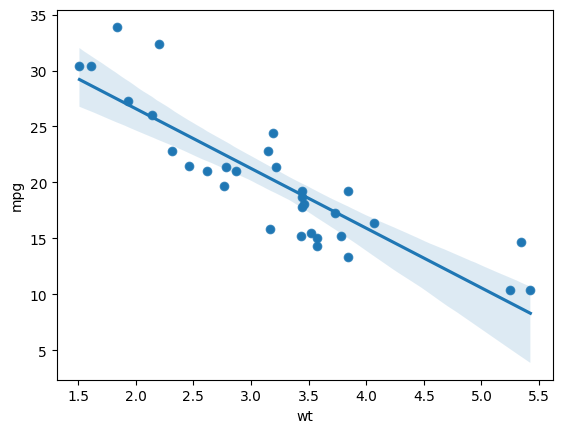

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn 
import seaborn as sns

cars_file = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
cars = pd.read_csv(cars_file)
cars.head()

sns.scatterplot(x='wt', y='mpg', data=cars)
sns.regplot(x='wt', y='mpg', data=cars)

X_list = cars.wt.values
y_list = cars.mpg.values

X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
y_np = np.array(y_list, dtype=np.float32).reshape(-1,1)

X = torch.from_numpy(X_np)
y_true = torch.from_numpy(y_np)

In [2]:
# creating a class for the model in order to use in a comfortabe way 
class LinearRegressionTorch(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionTorch, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        return self.linear(x)

input_dim = 1
output_dim = 1
model = LinearRegressionTorch(input_size=input_dim, output_size=output_dim)

Esto es importante, LinearRegressionTorch es una subclase de nn.Module (como una herencia). 
la línea super(LinearRegressionTorch, self).__init__() se utiliza para asegurar que la instancia de la clase base se inicializa 
antes que la clase derivada. 
Es por esta relación base-derivada que en el siguiente code snippet se puede instanciar el método parameters que le pertenece a la clase base 

Epoch 0, Loss: 330.9324035644531
Epoch 100, Loss: 66.57395935058594
Epoch 200, Loss: 40.17652130126953
Epoch 300, Loss: 25.818954467773438
Epoch 400, Loss: 18.0098819732666
Epoch 500, Loss: 13.762517929077148
Epoch 600, Loss: 11.452377319335938
Epoch 700, Loss: 10.195903778076172
Epoch 800, Loss: 9.512504577636719
Epoch 900, Loss: 9.14080810546875
1000
1000


<Axes: >

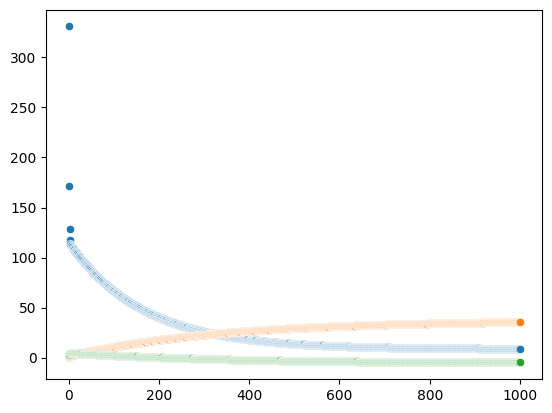

In [3]:
# hyperparameter definition
LR = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=LR)
losses, slope, bias = [], [], []
NUM_EPOCHS = 1000
loss_fun = nn.MSELoss()

for epoch in range(NUM_EPOCHS):
    
    # set gradients to zero
    optimizer.zero_grad()

    # forward pass
    y_pred = model.forward(X)

    # calculate loss
    loss = loss_fun(y_pred, y_true)
    loss.backward()

    # update parameters
    optimizer.step()

    # get parameters
    for name, param in model.named_parameters():
        if param.requires_grad:
            if name == 'linear.weight':
                slope.append(param.data.numpy()[0][0])
            if name == 'linear.bias':
                bias.append(param.data.numpy()[0])


    # store loss
    losses.append(float(loss.data))
    # print loss
    if (epoch % 100 == 0):
        # store loss
        print(f"Epoch {epoch}, Loss: {loss.data}")

print(len(range(NUM_EPOCHS)))
print(len(losses))

sns.scatterplot(x=range(NUM_EPOCHS), y=losses) # visualize model training
sns.scatterplot(x=range(NUM_EPOCHS), y=bias) # visualise the bias development
sns.scatterplot(x=range(NUM_EPOCHS), y=slope) # visualise the slope development


<Axes: >

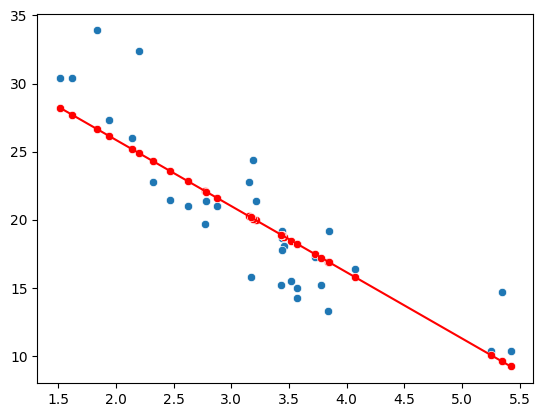

In [5]:
# check the result 
y_pred = model(X).data.numpy().reshape(-1)
sns.scatterplot(x=X_list, y=y_list)
sns.scatterplot(x=X_list, y=y_pred, color='red')
sns.lineplot(x=X_list, y=y_pred, color='red')